In [1]:
import h5py
import numpy as np

from grav_waldo.unet import FitUNet

<font size=3.5> 

The **Waveform AnomaLy DetectOr** (WALDO) uses an U-Net for predicting numerical relativistic waveforms. 

The *FitUNet* class provides the training and evaluation functions for the neural network.

### **K-fold validation:**

In [2]:
path_dset = "dataset/dset_wfsHM"

with h5py.File(path_dset + ".h5", "r") as f:
    X_shape = np.array(f['X']).shape
    y_shape = np.array(f['y']).shape
    
_, latent_dim = X_shape
Nf, Nt, _ = y_shape

keys = {'filters':[32, 64, 128, 256, 512],
        'kernel_size':3,
        'Nf':Nf,
        'Nt':Nt,
        'shownet':False}

unet = FitUNet(keys)

print(unet.__doc__)


    The FitUNet is a child class of UNet. It receives the setup UNet dictionary with: 
    - filters: the list of CNN number of filters by layer;
    - kernel_size: the CNN kernel-size value;
    - Nf: the dataset size;
    - Nt: the waveform length;
    - shownet: the boolean flag for showing the network layer shapes.

    * E.g.: 
        keys = {'filters':[32, 64, 128, 256, 512],
                'kernel_size':3,
                'Nf':8046,
                'Nt':2048,
                'shownet':True}
    
    
    This class initializes the mean squared error loss function and the Adagrad 
    optimizer for learning-rate = 0.001. 
    
    
    There are four methods:
    → train(): it trains the model according to the training and validation data.
      Check the function parameters in "train.__doc__".
    
    → kfold(): it uses the train() method to provide a K-fold validation.
      Check the function parameters in "kfold.__doc__".
    
    → plot_metrics(save, save_path): it plots

In [3]:
print(unet.kfold.__doc__)


        Input arguments: 
        
        · path_dset: dataset path/name;
        · kfold: the number of folds for validation;
        · epochs: number of epochs for training;
        · batch_size: data batch-size number;
        . shuffle: boolean flag to allow shuffling data in the DataGen object;
        . verbose: boolean flag to allow printing the metric status;
        · patience: integer value of how many epochs to wait for better training results
          before stopping training;
        . min_delta: the value tolerated above the best training loss before stopping 
          training (default:1e-8);
        · save: boolean key to allow saving;
        · path_unet: the path/name given to the trained u-net.
        


In [4]:
unet.kfold(path_dset=path_dset, kfold=3, epochs=500, batch_size=1, shuffle=True, verbose=False,
           patience=10, min_delta=1e-08, save=False, path_unet='dataset/unet')

Training:1170 - Validation:585 - Testing:195



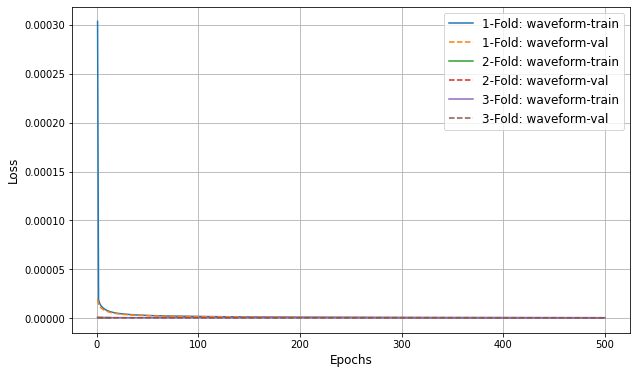

In [5]:
unet.plot_metrics(save=False, save_path="./")

### **Final training:** 

In [3]:
print(unet.train.__doc__)


        Input arguments: 
        
        · path_dset: dataset path/name;
        · train_IDs: list of indexes corresponding to the dataset training part;
        · val_IDs: list of indexes corresponding to the dataset validation part;
        · test_IDs: list of indexes corresponding to the dataset testing part;
        · epochs: number of epochs for training;
        · batch_size: data batch-size number;
        . shuffle: boolean flag to allow shuffling data in the DataGen object;
        . verbose: boolean flag to allow printing the metric status;
        · patience: integer value of how many epochs to wait for better training results
          before stopping training;
        . min_delta: the value tolerated above the best training loss before stopping 
          training (default:1e-8);
        · save: boolean key to allow saving;
        · path_unet: the path/name given to the trained u-net.
        


In [4]:
unet.train(path_dset=path_dset, epochs=500, batch_size=1, save=False, verbose=False, path_unet='dataset/unet')

[Train] NR values: q = 3.0, chi1 = (-0.00e+00, 0.00e+00, -0.00e+00), chi2 = (0.00e+00, 0.00e+00, -6.00e-01), e = 1.0e-04
[Train] NR values: q = 3.0, chi1 = (-0.00e+00, 0.00e+00, 7.45e-01), chi2 = (0.00e+00, -0.00e+00, 6.97e-01), e = 4.0e-04
[Train] NR values: q = 1.7, chi1 = (-0.00e+00, 0.00e+00, 4.00e-01), chi2 = (0.00e+00, 0.00e+00, 8.00e-01), e = 1.0e-04


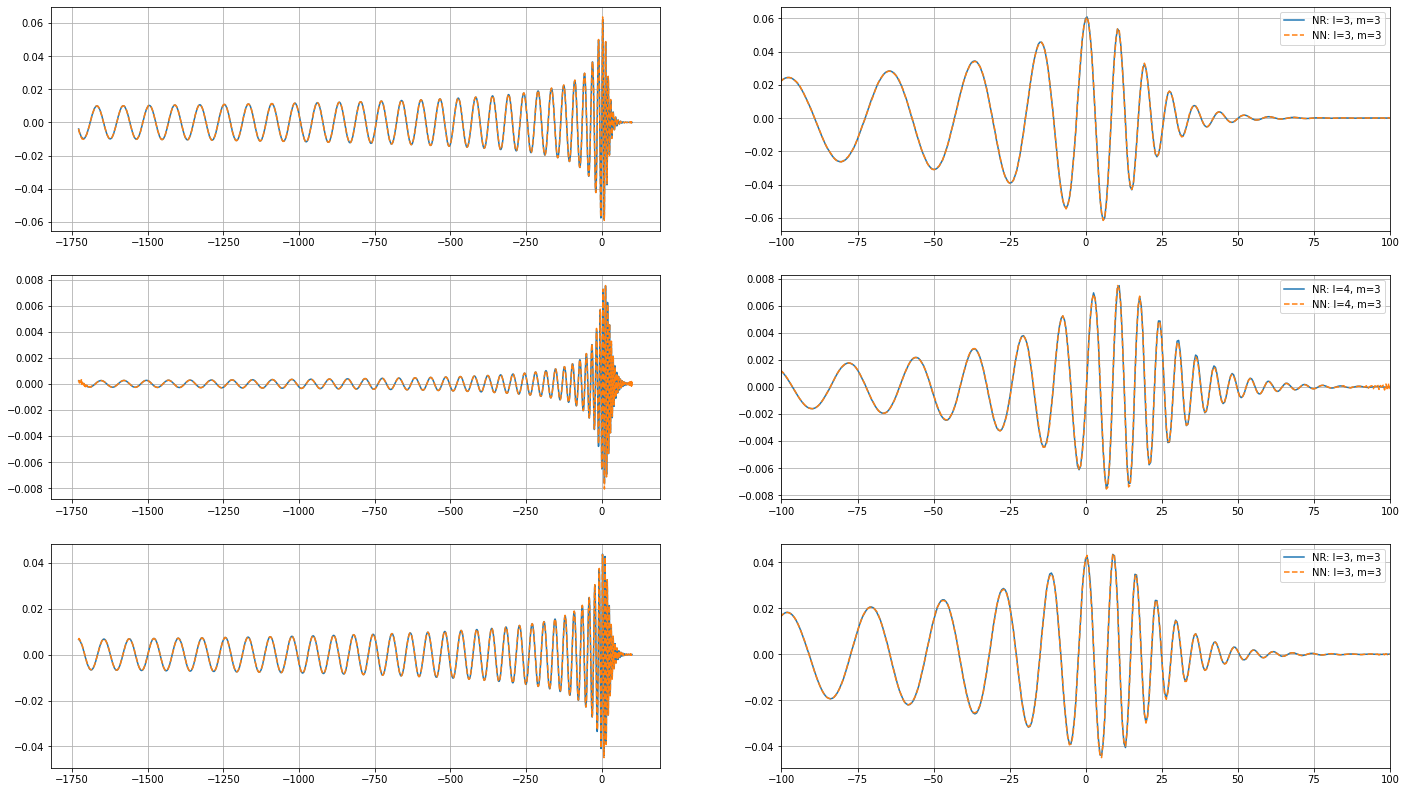

[Test] NR values: q = 1.3, chi1 = (-0.00e+00, 0.00e+00, 8.00e-01), chi2 = (0.00e+00, 0.00e+00, -4.00e-01), e = 1.0e-04
[Test] NR values: q = 3.0, chi1 = (-0.00e+00, -0.00e+00, -7.31e-01), chi2 = (-0.00e+00, 0.00e+00, 8.50e-01), e = 2.0e-04
[Test] NR values: q = 6.5, chi1 = (-0.00e+00, -0.00e+00, 7.20e-01), chi2 = (-0.00e+00, -0.00e+00, -3.19e-01), e = 6.0e-04


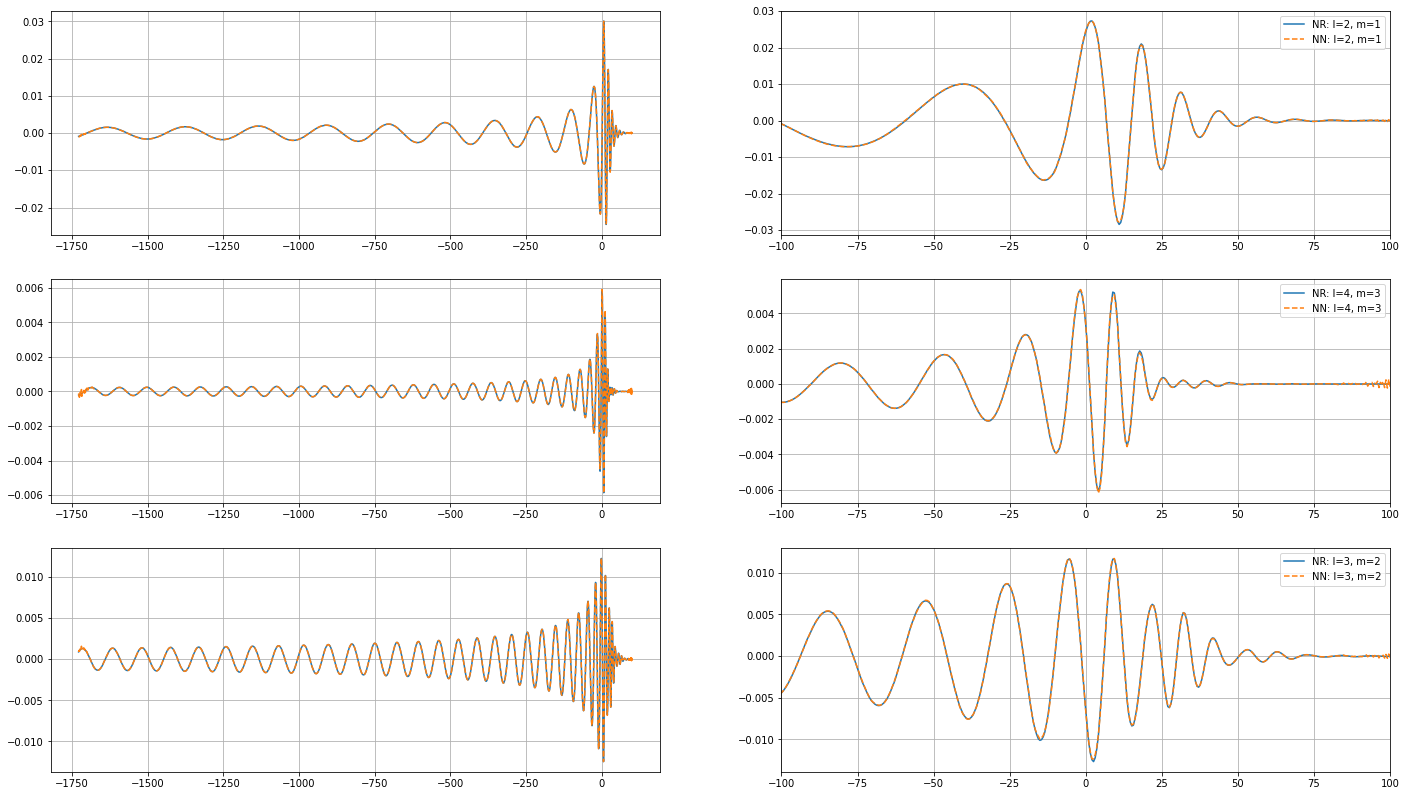

In [5]:
unet.plot_waveforms(save=False, save_path="./")

[Train] wf mismatch: max=0.9982368006670996, min=8.96368511904555e-06, mean=0.023842102624124534


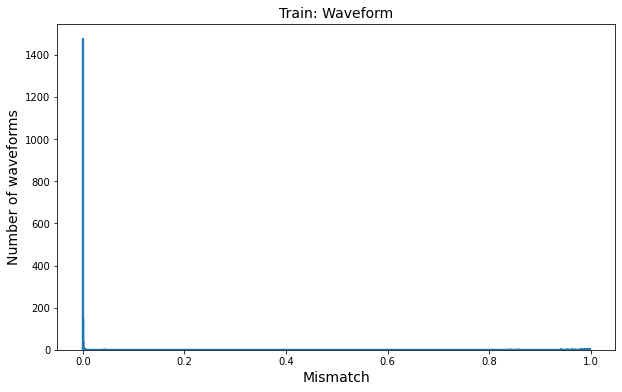

[Test] wf mismatch: max=0.9966029112609703, min=1.085442537485104e-05, mean=0.03228226577442306


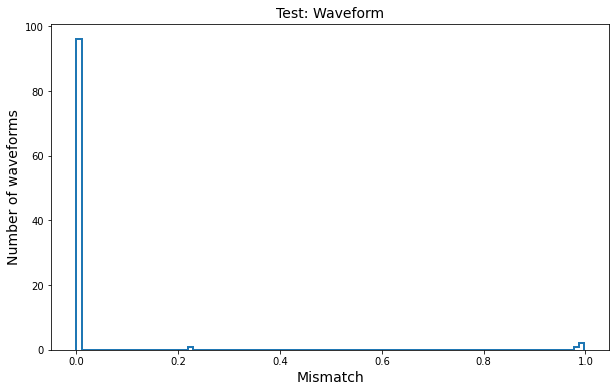

In [6]:
unet.plot_histogram(save=False, save_path="./")